In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [68]:
mydata=pd.read_csv('G:\Dataset\Depression.csv')
mydata.head(5)


,id,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,1,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865
1,2,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688
2,3,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699
3,4,0.74118,0.35589,0.56641,0.83522,0.42218,0.65639
4,5,0.53366,0.77014,0.50182,0.47697,0.81423,0.53518


In [69]:
mydata.drop('id', axis=1,inplace=True)

In [70]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   simplicity  82 non-null     float64
 1   fatalism    82 non-null     float64
 2   depression  82 non-null     float64
 3   adjsimp     82 non-null     float64
 4   adjfatal    82 non-null     float64
 5   adjdep      82 non-null     float64
dtypes: float64(6)
memory usage: 4.0 KB


In [71]:
mydata.describe()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,1.000000,1.000000,1.000001,1.000000,1.000000,1.000000
std,0.500000,0.500001,0.500000,0.499999,0.500000,0.500000
min,0.250680,-0.058370,0.469530,0.235690,0.030120,0.234540
25%,0.656282,0.563010,0.566410,0.697958,0.731598,0.596565
50%,0.882665,0.977270,0.824750,0.968490,0.924290,0.967845
75%,1.269400,1.391520,1.373730,1.201790,1.299120,1.261750
max,2.854080,2.220030,2.245650,2.949770,2.249310,2.787630


In [72]:
from scipy.stats import zscore
mydata_z=mydata.apply(zscore)

In [73]:
mydata_z.head()

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep
0,-0.141205,-1.296147,-0.807541,-0.484282,-1.797534,-1.169856
1,-0.179157,0.371048,-0.547611,-0.549018,-0.001710,-0.972187
2,-0.938421,-2.129764,-0.937516,-0.761136,-1.935619,-0.589627
3,-0.520827,-1.296147,-0.872518,-0.331588,-1.162751,-0.691450
4,-0.938421,-0.462549,-1.002493,-1.052499,-0.373826,-0.935361


In [74]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(mydata)
    prediction=model.predict(mydata)
    meanDistortions.append(sum(np.min(cdist(mydata,model.cluster_centers_,'euclidean'),axis=1))/mydata.shape[0])
    

C:\Users\sushm\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'selecting k with elbow method')

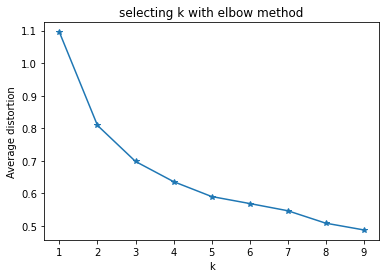

In [75]:
plt.plot(clusters,meanDistortions,'*-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('selecting k with elbow method')

In [76]:
kmeans=KMeans(n_clusters=3)


In [77]:
kmeans.fit(mydata_z)

KMeans(n_clusters=3)

In [78]:
centroids=kmeans.cluster_centers_

In [79]:
centroids

array([[-0.60393647, -0.72164273, -0.90062454, -0.48447657, -0.63244733,
        -0.83635699],
       [-0.00240129,  0.30593064,  0.47588456, -0.15570731,  0.21543758,
         0.41698529],
       [ 1.72480697,  1.30084619,  1.39190785,  1.7621744 ,  1.26973449,
         1.35397533]])

In [80]:
centroids_df=pd.DataFrame(centroids, columns=list(mydata_z))

In [81]:
print(centroids_df)

   simplicity  fatalism  depression   adjsimp  adjfatal    adjdep
0   -0.603936 -0.721643   -0.900625 -0.484477 -0.632447 -0.836357
1   -0.002401  0.305931    0.475885 -0.155707  0.215438  0.416985
2    1.724807  1.300846    1.391908  1.762174  1.269734  1.353975


In [82]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1])

In [83]:
df_labels=pd.DataFrame(kmeans.labels_,columns=list(['labels']))
df_labels['labels']=df_labels['labels']

In [84]:
df_labeled=mydata.join(df_labels)

In [85]:
df_analysis=(df_labeled.groupby(['labels'],axis=0)).head(3)
df_analysis

,simplicity,fatalism,depression,adjsimp,adjfatal,adjdep,labels
0,0.92983,0.35589,0.59870,0.75934,0.10673,0.41865,0
1,0.91097,1.18439,0.72787,0.72717,0.99915,0.51688,0
2,0.53366,-0.05837,0.53411,0.62176,0.03811,0.70699,0
15,0.98643,1.39152,0.72787,1.38099,1.82207,1.01999,1
17,0.83550,1.18439,0.56641,1.23164,1.67146,0.92942,1
21,0.70345,1.39152,0.59870,0.77089,1.50663,0.60579,1
47,1.68444,1.39152,1.37373,1.67889,1.52260,1.52332,2
49,2.08061,1.39152,1.27685,2.06284,1.27404,1.15978,2
52,1.59011,1.59865,1.14768,1.67363,1.74808,1.24102,2


In [86]:
df_labeled['labels'].value_counts()

0    37
1    32
2    13
Name: labels, dtype: int64

In [1]:
pwd

'C:\\Users\\sushm'